In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [2]:
# Load training and test data
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')


In [3]:
print(train_df.head())  # View first few rows
print(train_df.info())  # Check data types and missing values
print(train_df.describe())  # Get summary statistics


            ID     country  year urban_or_rural  ghsl_water_surface  \
0  ID_AAIethGy    Ethiopia  2016              R                 0.0   
1  ID_AAYiaCeL    Ethiopia  2005              R                 0.0   
2  ID_AAdurmKj  Mozambique  2009              R                 0.0   
3  ID_AAgNHles      Malawi  2015              R                 0.0   
4  ID_AAishfND      Guinea  2012              U                 0.0   

   ghsl_built_pre_1975  ghsl_built_1975_to_1990  ghsl_built_1990_to_2000  \
0             0.000000                 0.000000                 0.000055   
1             0.000000                 0.000110                 0.000000   
2             0.000000                 0.000000                 0.000000   
3             0.000141                 0.000181                 0.000254   
4             0.011649                 0.017560                 0.017383   

   ghsl_built_2000_to_2014  ghsl_not_built_up  ghsl_pop_density  \
0                 0.000536           0.999408    

In [4]:
# Identify numeric columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop(['Target'], errors='ignore')

# Impute missing values using median
imputer = SimpleImputer(strategy='median')
train_df[numeric_cols] = imputer.fit_transform(train_df[numeric_cols])
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])


In [7]:
# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# One-hot encode categorical data (corrected)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  
encoder.fit(train_df[categorical_cols])

# Transform categorical features
train_categorical_encoded = encoder.transform(train_df[categorical_cols])
test_categorical_encoded = encoder.transform(test_df[categorical_cols])

# Convert to DataFrame with correct index
train_categorical_df = pd.DataFrame(train_categorical_encoded, index=train_df.index)
test_categorical_df = pd.DataFrame(test_categorical_encoded, index=test_df.index)


In [8]:
# Define X (features) and y (target)
X = train_df[numeric_cols]
y = train_df['Target']


In [9]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df[numeric_cols])

# Combine numeric and categorical features
X_train_final = np.hstack((X_train_scaled, train_categorical_encoded[:len(X_train)]))
X_val_final = np.hstack((X_val_scaled, train_categorical_encoded[len(X_train):]))
X_test_final = np.hstack((X_test_scaled, test_categorical_encoded))


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Handle missing values
imputer = SimpleImputer(strategy="mean")  # Replace NaN with mean values

# Separate features and target variable
X = train_df.drop(['ID', 'Target'], axis=1, errors='ignore')
y = train_df.get('Target')

# If target column is missing, print a warning
if y is None:
    raise ValueError("Error: Target column 'Target' not found in the dataset.")

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # `sparse_output` replaces `sparse`
X_categorical_encoded = encoder.fit_transform(X[categorical_cols])

# Scale numerical features
X_numeric_imputed = imputer.fit_transform(X[numeric_cols])  # Fill missing values
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric_imputed)

# Combine processed categorical & numerical features
X_final = np.hstack((X_numeric_scaled, X_categorical_encoded))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Reduce training data size if necessary
subset_size = int(0.5 * len(X_train))  # Reduce to 50% of the training data for efficiency
random_indices = np.random.choice(len(X_train), subset_size, replace=False)
X_train_small = X_train[random_indices]
y_train_small = np.array(y_train)[random_indices]

# Train the Random Forest model with optimized parameters
model = RandomForestRegressor(
    n_estimators=50,  # Reduce trees for faster training
    max_depth=10,  # Limit depth to prevent overfitting
    min_samples_split=5,  # Ensure minimum samples per split
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
model.fit(X_train_small, y_train_small)

# Make predictions
y_pred_val = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_val)
print(f'Mean Squared Error: {mse:.2f}')

# Prepare test data for predictions
X_test = test_df.drop(['ID'], axis=1, errors='ignore')
X_test_categorical_encoded = encoder.transform(X_test[categorical_cols])
X_test_numeric_imputed = imputer.transform(X_test[numeric_cols])
X_test_numeric_scaled = scaler.transform(X_test_numeric_imputed)
X_test_final = np.hstack((X_test_numeric_scaled, X_test_categorical_encoded))

# Make final predictions
y_pred_test = model.predict(X_test_final)

# Save predictions to a CSV file
submission_df = pd.DataFrame({'ID': test_df['ID'], 'Target': y_pred_test})
submission_df.to_csv('submission.csv', index=False)

print("✅ Model training and predictions completed successfully!")


Mean Squared Error: 0.01
✅ Model training and predictions completed successfully!


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')


Root Mean Squared Error (RMSE): 0.0953
R² Score: 0.7558


In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
}

# Randomized Search
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    n_iter=10,  # Number of different combinations to try
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)

# Train model with best params
best_model = RandomForestRegressor(**random_search.best_params_, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.1s
[CV] END max_depth=20, min_samples_l

RandomForestRegressor(min_samples_leaf=2, min_samples_split=10, n_jobs=-1,
                      random_state=42)

In [22]:
model.fit(X_final, y)


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=50,
                      n_jobs=-1, random_state=42)

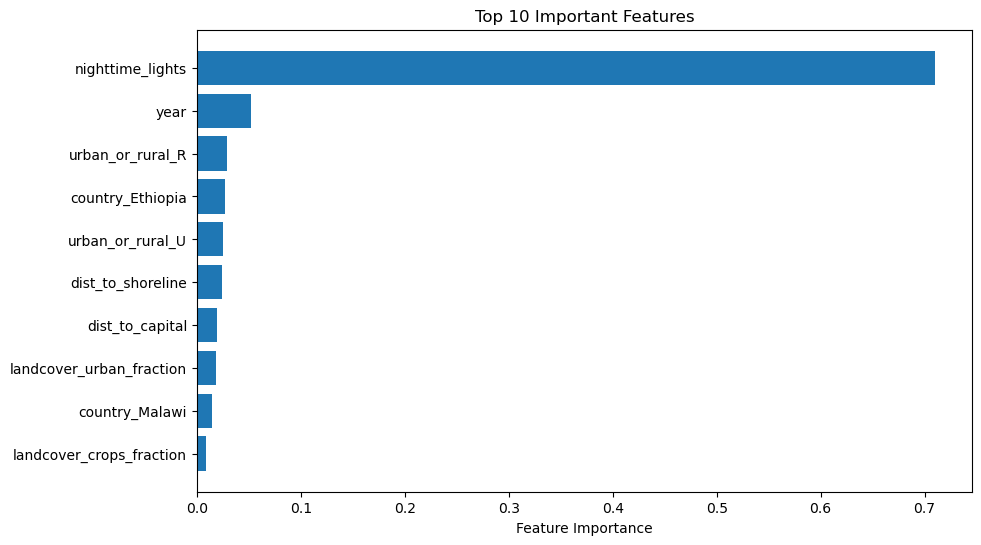

In [23]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = np.concatenate((numeric_cols, encoder.get_feature_names_out()))

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx][:10], feature_importances[sorted_idx][:10])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [25]:
y_pred_test_final = best_model.predict(X_test_final)

# Save final predictions
final_submission = pd.DataFrame({'ID': test_df['ID'], 'Target': y_pred_test_final})
final_submission.to_csv('final_submission.csv', index=False)

print("Final submission file saved: 'final_submission.csv'")


Final submission file saved: 'final_submission.csv'


In [28]:
import joblib

# Save the trained model
joblib.dump(model, "loan_default_model.pkl")

print("Model saved successfully as loan_default_model.pkl")


Model saved successfully as loan_default_model.pkl


In [30]:
import joblib

joblib.dump(best_model, "model.pkl")


['model.pkl']

In [33]:
import streamlit as st
import pandas as pd

# Collect user inputs
age = st.number_input("Enter Age", min_value=18, max_value=100)
income = st.number_input("Enter Monthly Income")
loan_amount = st.number_input("Enter Loan Amount")

# Prepare input data for model
input_data = pd.DataFrame([[age, income, loan_amount]], columns=["Age", "Income", "LoanAmount"])

# Debugging
st.write("Input data shape:", input_data.shape)
st.write("Input data:", input_data)


2025-03-27 22:41:21.503 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-03-27 22:41:21.800 
  command:

    streamlit run c:\Users\USER\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
